# Xray Measurements on Ferroelectric LC Liquid Crystals 

In [1]:
import numpy as np
from numpy import *
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.colors import Normalize
import collections
from itertools import groupby
# Scientific libraries
from numpy import arange,array,ones
from scipy import stats
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from pylab import figure, axes, pie, title, show
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
import random
%matplotlib notebook
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["mathtext.fontset"] = 'cm'
plt.rcParams["axes.labelsize"] = '13'
plt.rcParams['xtick.major.size'] = '3'
plt.rcParams['grid.alpha'] = '0.5'
plt.rcParams['legend.fontsize'] = '11'
plt.rcParams['errorbar.capsize'] = '2.5'
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['xtick.labelsize'] = '12'
plt.rcParams['ytick.labelsize'] = '12'
plt.rcParams['text.usetex'] = False #True

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
shapes = ['o', 'X', 's', 'd', 'v', '^']



data=np.loadtxt('E:/AI_LC/FLC_xray.txt')
temp=data[:,0]
d_spacing=data[:,1]
tilt_angle=data[:,2]

In [2]:
def tilt_fit(x,a,b,c,d):
    return a * (np.sqrt(np.sqrt(1 + (x-b) / c ) - 1)) + d*(x-b)
#a*((((1+x/x0)**0.5)-1)**0.5)+b*x

                                                        
popt,pcov = curve_fit(tilt_fit,temp,tilt_angle,p0=[0, 0, 0, 0], bounds=(-np.inf, np.inf), method='lm')
pfit = tilt_fit(temp,*popt)

C:\Users\vijay\AppData\Local\Temp/ipykernel_22820/338631993.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return a * (np.sqrt(np.sqrt(1 + (x-b) / c ) - 1)) + d*(x-b)
C:\Users\vijay\AppData\Local\Temp/ipykernel_22820/338631993.py:2: RuntimeWarning: invalid value encountered in multiply
  return a * (np.sqrt(np.sqrt(1 + (x-b) / c ) - 1)) + d*(x-b)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [28]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like or object
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, but can actually be any object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
        Initial guess for the parameters (length N). If None, then the
        initi

### Xray measurements were performed using the PANalytical X‟Pert PRO MP Xray diffractometer.

<IPython.core.display.Javascript object>


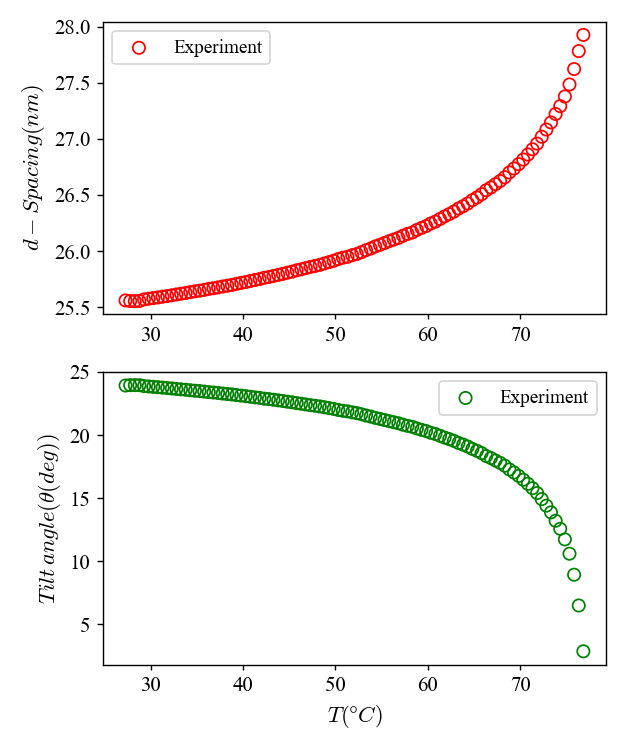

In [3]:
fig,ax=plt.subplots(2,figsize=(5,6))
ax[0].scatter(temp,d_spacing,s=50,facecolors='none', edgecolors='r',label='Experiment')
ax[0].set_ylabel(r'$d-Spacing(nm)$')
ax[0].legend()

ax[1].scatter(temp,tilt_angle,s=50,facecolors='none', edgecolors='g',label='Experiment')
#ax[1].plot(temp,pfit,'--k')
ax[1].set_xlabel(r'$T(\degree C)$')
ax[1].set_ylabel(r'$Tilt\,angle(\theta(deg))$')
ax[1].legend()

plt.tight_layout()

In [8]:
x_train, x_test, y_train, y_test= train_test_split(temp, tilt_angle, test_size= 0.2, random_state=0)  

<IPython.core.display.Javascript object>


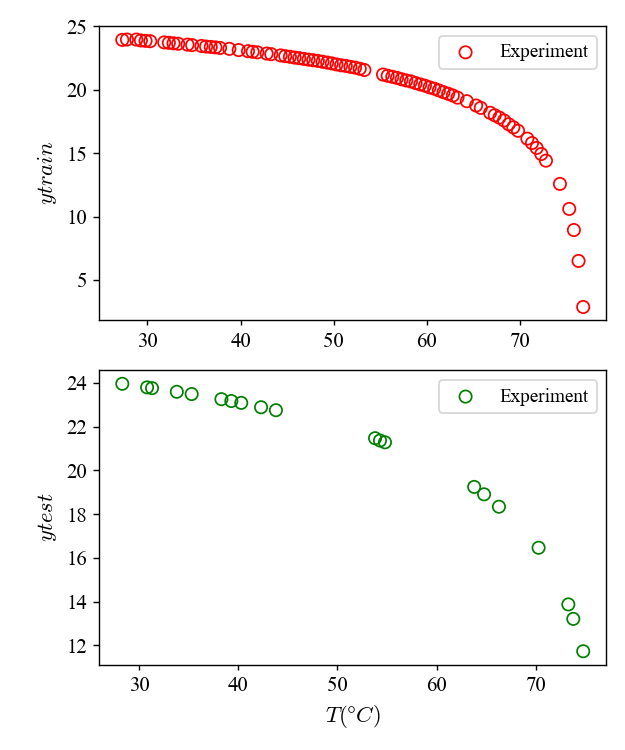

In [9]:
fig,ax=plt.subplots(2,figsize=(5,6))
ax[0].scatter(x_train,y_train,s=50,facecolors='none', edgecolors='r',label='Experiment')
ax[0].set_ylabel(r'$ytrain$')
ax[0].legend()

ax[1].scatter(x_test,y_test,s=50,facecolors='none', edgecolors='g',label='Experiment')
#ax[1].plot(temp,pfit,'--k')
ax[1].set_xlabel(r'$T(\degree C)$')
ax[1].set_ylabel(r'$ytest$')
ax[1].legend()

plt.tight_layout()

<IPython.core.display.Javascript object>


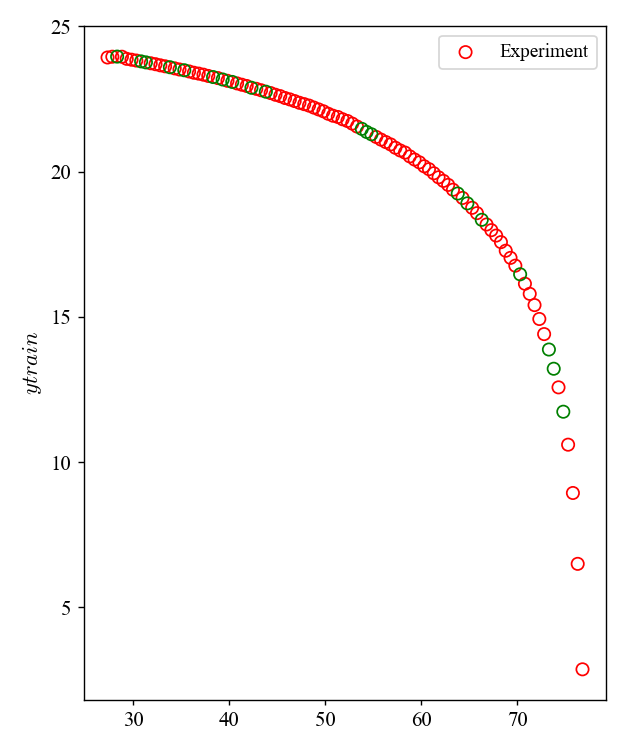

In [10]:
fig,ax=plt.subplots(1,figsize=(5,6))
ax.scatter(x_train,y_train,s=50,facecolors='none', edgecolors='r',label='Experiment')
ax.set_ylabel(r'$ytrain$')
ax.legend()

ax.scatter(x_test,y_test,s=50,facecolors='none', edgecolors='g',label='Experiment')


plt.tight_layout()